<a href="https://colab.research.google.com/github/IbnuSyifa/CapstoneProject/blob/main/Capstone_Ibnu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install langchain_community

!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.0 MB/s eta 0:00:00


In [3]:
from langchain_community.llms import Replicate
import os
import pandas as pd
from google.colab import files
from google.colab import userdata

# Set the API token

api_token = userdata.get('api_token')

os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup

model = "ibm-granite/granite-3.3-8b-instruct"

output = Replicate(model=model,replicate_api_token=api_token,)

# Upload file dari perangkat
uploaded = files.upload()

# Baca file CSV (asumsikan hanya satu file diunggah)
for filename in uploaded.keys():
    print(f"Data dari {filename} berhasil dimuat:")
    df = pd.read_csv(filename)
    print(df.head())

Saving Crawl.csv to Crawl.csv
Data dari Crawl.csv berhasil dimuat:
              username                                            comment
0  @setiawanefendi2476  Aneh banget USA ini, maunya surplus gak mau de...
1      @iqbalmalau3090                    MAKE AMERICA GREAT AGAIN !!!!!!
2    @thamrinyusup8844  Semua omon2 aja..ini akibat rakyat di paksa me...
3    @redmodelzone4004                                      sukses teman2
4       @dianaulia2454                                   58% pasti bangga


In [17]:
import pandas as pd

if 'comment' not in df.columns:
    raise ValueError("Kolom 'review' tidak ditemukan dalam dataset.")


user_comment = df['comment'].dropna().tolist()


comment_text = "\n".join([f"Comment {i+1}: {comment}" for i, comment in enumerate(user_comment)])

prompt = f"""
Classify the {comment_text} as 'Positive', 'Negative', or 'Neutral'. Give the reasons why.
Show the results in a table format with table header: Comment Number, Classification, Comment, and Reason.
{comment_text}
"""

response = output.invoke(prompt)

print("Granite Model Response:\n")
print(response)


Granite Model Response:

### Comment Classification and Analysis

Here's a table summarizing the comments, their classifications, and brief analysis:

| Comment Number | Classification | Comment | Reason/Summary |
|----------------|---------------|---------|--------------|
| 1               | Negative     | Aneh banget USA ini, maunya surplus gak mau defisit. Kalo gitu mah ganti aja kebijakannya jadi perdagangan berbasis pertukaran (barter) gak akan ada defisit-surplus tuh, nanti beras diganti pesawat jet 😂😂😂 | The commenter criticizes the US trade deficit, suggesting a barter system instead, humorously proposing the trade of rice for jet planes. |
| 2               | Neutral      | MAKE AMERICA GREAT AGAIN !!!!!! | A slogan popularized by former US President Donald Trump, without context indicating positive or negative sentiment. |
| 3               | Negative     | Semua omon2 aja..ini akibat rakyat di paksa memilih maunya penguasa. Rakyat harus cerdik dan cerdas..bukan krn 50 ribu d

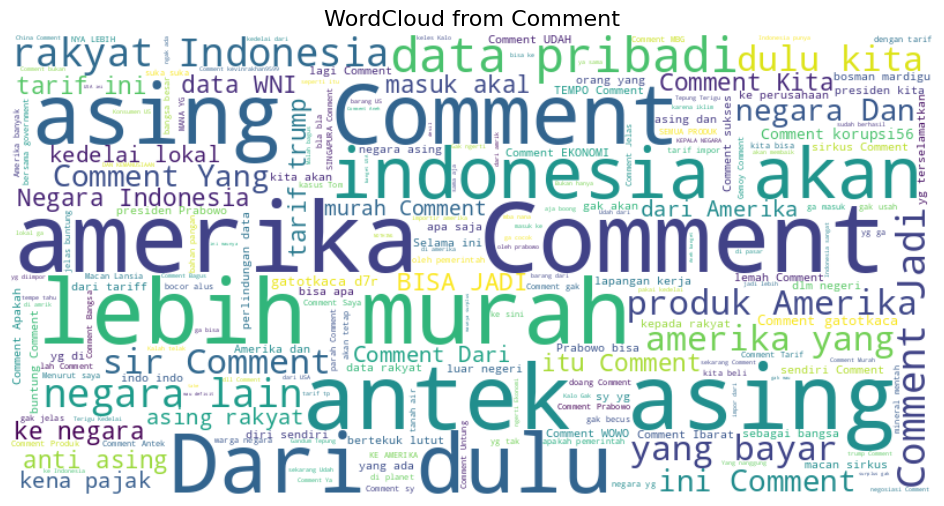

In [23]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv(filename)


if 'comment' not in df.columns:
    raise ValueError("Kolom 'comment' tidak ditemukan dalam dataset.")

# === Gabungkan semua teks review menjadi satu string ===
text = " ".join(comment_text for comment in df['comment'].dropna().astype(str))

# === Membuat WordCloud ===
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=200, colormap='viridis').generate(text)

# === Tampilkan WordCloud ===
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud from Comment", fontsize=16)
plt.show()


In [25]:
!pip install ace_tools

In [ ]:
import re
from collections import Counter

# Gabungkan semua komentar jadi satu string, lowercase, hapus URL/mention/punctuation
text = " ".join(df['comment'].dropna().astype(str)).lower()
text = re.sub(r'http\S+|@\S+', '', text)
text = re.sub(r'[^\w\s]', '', text)

# Tokenisasi & filter stopwords sederhana
words = text.split()
stopwords = {
    'yang','ini','dan','di','ke','dengan','untuk','gak','ga',
    'aja','banget','ya','lho','nya','itu','the','make','america',
    'great','again','all','yg','dari','jadi','ada'
}
filtered = [w for w in words if w not in stopwords and len(w) > 1]

# Hitung frekuensi & ambil top 10
common = Counter(filtered).most_common(10)
df_common = pd.DataFrame(common, columns=['Word', 'Count'])

# Tampilkan hasil di Colab
from IPython.display import display
print("Top 10 Most Frequent Words in Comments:")
display(df_common)

In [ ]:
print(comment_text)